## 합성곱 신경망 ( Convolution Neural Network )

### 이미지 인식, 음성 인식 등에 자주 사용되는데 특히, 이미지 인식 분야에서 거의 모든 딥러닝 기술에 사용

### Read Data

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPool1D

In [2]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)

print(len(input_train))
print(len(input_test))

25000
25000


In [3]:
pax_x_train = pad_sequences(input_train, maxlen = max_len)
pax_x_test = pad_sequences(input_test, maxlen = max_len)

print(pax_x_train.shape)
print(pax_x_test.shape)

(25000, 500)
(25000, 500)


### Modeling

In [4]:
def build_model():
    model = Sequential()
    
    model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
    model.add(Conv1D(32, 7, activation='relu'))
    model.add(MaxPooling1D(7))
    model.add(Conv1D(32, 5, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(GlobalMaxPool1D())
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=RMSprop(learning_rate = 1e-4),
                 loss = 'binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [5]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           7200      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 70, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 66, 32)            5152      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 32)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0

2022-01-20 13:07:45.617587: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
history = model.fit(pax_x_train, y_train,
                   batch_size=128, epochs=30,
                   validation_split=0.2)

Epoch 1/30
157/157 [==============================] - 6s 35ms/step - loss: 0.6929 - accuracy: 0.5142 - val_loss: 0.6929 - val_accuracy: 0.4972
Epoch 2/30
157/157 [==============================] - 6s 36ms/step - loss: 0.6908 - accuracy: 0.5770 - val_loss: 0.6917 - val_accuracy: 0.5672
Epoch 3/30
157/157 [==============================] - 5s 34ms/step - loss: 0.6883 - accuracy: 0.6441 - val_loss: 0.6904 - val_accuracy: 0.5198
Epoch 4/30
157/157 [==============================] - 5s 35ms/step - loss: 0.6845 - accuracy: 0.6972 - val_loss: 0.6860 - val_accuracy: 0.6612
Epoch 5/30
157/157 [==============================] - 6s 39ms/step - loss: 0.6762 - accuracy: 0.7655 - val_loss: 0.6736 - val_accuracy: 0.7404
Epoch 6/30
157/157 [==============================] - 6s 38ms/step - loss: 0.6553 - accuracy: 0.7781 - val_loss: 0.6416 - val_accuracy: 0.7736
Epoch 7/30
157/157 [==============================] - 7s 42ms/step - loss: 0.6074 - accuracy: 0.8010 - val_loss: 0.5787 - val_accuracy: 0.7978

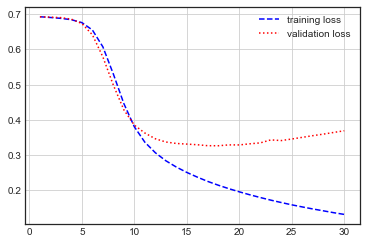

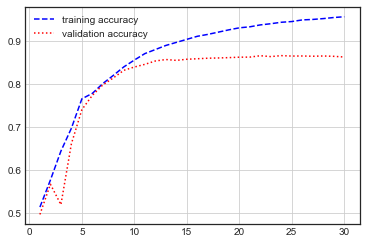

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training accuracy')
plt.plot(epochs, val_acc, 'r:', label = 'validation accuracy')
plt.grid()
plt.legend()

plt.show()

In [8]:
model.evaluate(pax_x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.3884 - accuracy: 0.8474


[0.3883667588233948, 0.8474000096321106]

### Read_data

In [9]:
from tensorflow.keras.datasets import reuters

In [10]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words = num_words)

print(len(input_train))
print(len(input_test))

8982
2246


In [11]:
pad_x_train = pad_sequences(input_train, maxlen=max_len)
pad_x_test = pad_sequences(input_test, maxlen = max_len)

print(pad_x_train.shape)
print(pad_x_test.shape)

(8982, 500)
(2246, 500)


### Modeling

In [12]:
def build_model():
    model = Sequential()
    
    model.add(Embedding(input_dim = num_words, output_dim=32, input_length=max_len))
    model.add(Conv1D(32, 7, activation = 'relu'))
    model.add(MaxPooling1D(7))
    model.add(Conv1D(32, 5, activation = 'relu'))
    model.add(MaxPooling1D(5))
    model.add(GlobalMaxPool1D())
    model.add(Dense(1, activation = 'softmax'))
    
    model.compile(optimizer='adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
    return model

In [13]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 conv1d_2 (Conv1D)           (None, 494, 32)           7200      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 70, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 66, 32)            5152      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 13, 32)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)              

In [14]:
history = model.fit(pad_x_train, y_train,
                   batch_size=128, epochs=30,
                   validation_split=0.2)

Epoch 1/30


2022-01-20 13:10:57.059175: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 43 which is outside the valid range of [0, 1).  Label values: 16 24 3 16 3 3 31 3 3 4 3 20 4 4 4 3 3 4 16 3 3 4 3 3 3 4 3 19 3 39 21 19 3 4 16 3 3 3 3 3 11 4 4 4 14 11 13 4 3 1 16 4 3 9 3 4 3 3 3 4 1 11 8 3 34 11 4 3 25 3 3 3 10 4 16 3 14 3 3 4 12 20 19 40 3 19 16 3 43 11 1 3 3 11 4 4 3 10 4 3 19 3 11 3 3 17 16 36 3 8 3 3 3 4 3 19 3 28 3 3 9 20 16 19 8 3 13 4


InvalidArgumentError:  Received a label value of 43 which is outside the valid range of [0, 1).  Label values: 16 24 3 16 3 3 31 3 3 4 3 20 4 4 4 3 3 4 16 3 3 4 3 3 3 4 3 19 3 39 21 19 3 4 16 3 3 3 3 3 11 4 4 4 14 11 13 4 3 1 16 4 3 9 3 4 3 3 3 4 1 11 8 3 34 11 4 3 25 3 3 3 10 4 16 3 14 3 3 4 12 20 19 40 3 19 16 3 43 11 1 3 3 11 4 4 3 10 4 3 19 3 11 3 3 17 16 36 3 8 3 3 3 4 3 19 3 28 3 3 9 20 16 19 8 3 13 4
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits
 (defined at /Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py:5113)
]] [Op:__inference_train_function_29443]

Errors may have originated from an input operation.
Input Source operations connected to node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits:
In[0] sparse_categorical_crossentropy/Reshape_1 (defined at /Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py:5109)	
In[1] sparse_categorical_crossentropy/Reshape (defined at /Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py:3561)

Operation defined at: (most recent call last)
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/var/folders/xb/jj9xzp2d6v37h6nvn74k10p00000gn/T/ipykernel_1153/1990310173.py", line 1, in <module>
>>>     history = model.fit(pad_x_train, y_train,
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 809, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 1737, in sparse_categorical_crossentropy
>>>     return backend.sparse_categorical_crossentropy(
>>> 
>>>   File "/Users/jody/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py", line 5113, in sparse_categorical_crossentropy
>>>     res = tf.nn.sparse_softmax_cross_entropy_with_logits(
>>> 

### EDA

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training accuracy')
plt.plot(epochs, val_acc, 'r:', label = 'validation accuracy')
plt.grid()
plt.legend()

plt.show()

### Evaluation

In [ ]:
model.evaluate(pad_x_test, y_test)